In [1]:
import pandas as pd
file = 'repetitors_1.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)


In [2]:
df_AP = df.drop(['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink', 'tutorname'], axis=1)

In [3]:
mark_dict = {
    'лучше не бывает!' : 10,
    'отлично' : 9,
    'почти отлично' : 8,
    'вполне хорошо' : 7,
    'хорошо' : 6,
    'почти хорошо' : 5,
    'более-менее' : 4,
    'так себе...' : 3,
    'плохо' : 2,
    'ужасно' : 1
}

In [4]:
df_AP = df_AP.replace({"mark": mark_dict}).dropna()

In [5]:
df_AP.mark *= 10

In [6]:
discipline_dict = {}
index  = 1
for discipline in df_AP['discipline'].unique():
    discipline_dict[discipline] = index
    index += 1

In [7]:
df_AP = df_AP.replace({"discipline": discipline_dict})

In [8]:
from ap import AffinityPropagation
x = df_AP.to_numpy()[::100]
labels = AffinityPropagation(x, 200, 0.5)

In [9]:
def normalize_labels(labels):
    count = 1
    new_labels = []
    dict_labels = {}
    for lab in labels:
        if lab not in dict_labels:
            dict_labels[lab] = count
            count += 1
        new_labels.append(dict_labels[lab])
    return new_labels

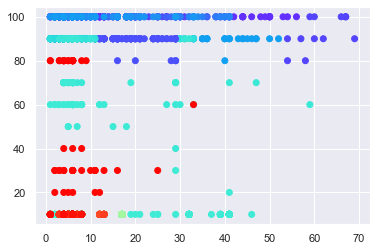

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], cmap='rainbow', c=normalize_labels(labels))
plt.show()